# Assignment 2: Fourier Analysis

## 0: Introduction

The following is adapted from chapter 12 of Numerical recipes, which may be reviewed if you would like a more complete introduction.

Imagine we have a process descibed as a function of time, $g(t)$. We say that this process is described in the _time domain_. We may also describe this process in the frequency domain, where the process is described by a specific amplitude $\tilde{g}(f)$. We can go back and forth between representations using Fourier transforms,

$$
\begin{align}
\tilde{g}(f) &= \int_{-\infty}^\infty g(t) e^{2\pi i f t}dt\\
g(t) &= \int_{-\infty}^{\infty} \tilde{g}(f) e^{-2\pi i f t}dt.
\end{align}
$$

In many physics applications, we perform Fourier transformations between position and momentum domains.

### Discrete Fourier Transforms

Consider a periodic function $h$, $h(x) = h(x+L)$ from some period $L$. We may represent this function as a Fourier series 

$$
h(x) = \sum_{k=-\infty}^{\infty} \tilde{h}_k e^{-2\pi i f_k x}, f_k = k/L.
$$

The Fourier coefficients $\tilde{h}_k$ may be recovered using the Fourier transform equation above.

We can map a set of $N$ time-domain values $h_i$ onto a set of $N$ frequency-domain functions by the transformation

$$
\tilde{h}_k = \frac{1}{N} \sum_{i=0}^{N-1} h_j e^{2\pi i f_k x_j},
$$

where $x_j = jL/N$ and $f_k = k/L$.


### FFTs

The Fast Fourier Transform (FFT) reduce the compute time from $O(N^2)$ to $O(N \log N)$, making them a lot more accessible for a variety of computations. Scipy has an implementation of FFT that we can make use of.

### PSDs

Parseval's theorem tells us that the total power of a signal is the same regardless of which domain we compute it in,

$$
\texttt{total power} = \int |g(t)|^2 dt = \int |\tilde{g}(f)|^2 dt.
$$

Often, one wants to compute how much power is contained in the interval $[f, f+df]$. We then regard the frequency as varying from $0$ to $\infty$ and define the one-sided power spectral density (PSD)

$$
P_g(f) = |\tilde{g}(f)|^2 + |\tilde{g}(-f)|^2 .
$$

### SNR

The signal-to-noise ratio compares the level of the desired signal to the level of the background noise.

## 1: SETI signals

SETI (Search for Extra Terrestrial Intelligence) analyzes signals collected from telescopes for messages from extraterrestrial civilizations. We are providing you with a ficticious time series of $32768$ elements sampled at intervals of 1 ms, representing the output of a telescope in Arecibo, Puerto Rico. 

#### (1) Import and plot the data as a function of time. Does it reveal in obvious features? 

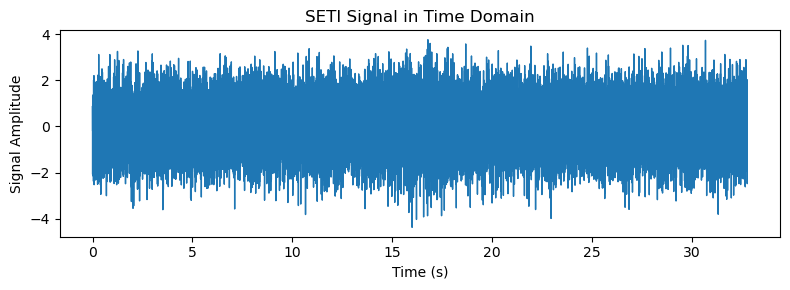

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  Load the data

data = np.loadtxt("arecibo1.txt")

# Number of samples
N = len(data)
dt = 1e-3
t = np.arange(N) * dt

# Plot the data in the time domain
plt.figure(figsize=(8, 3))
plt.plot(t, data, lw=1)
plt.xlabel("Time (s)")
plt.ylabel("Signal Amplitude")
plt.title("SETI Signal in Time Domain")
plt.tight_layout()
plt.show()

#  Compute the FFT and frequencies
fft_vals = np.fft.rfft(data)
freqs = np.fft.rfftfreq(N, d=dt)




From the time‐domain plot alone, there are no immediately obvious patterns or features—it mostly looks like noisy data with no clear periodicity or trend. 


This data actually has a roughly definite frequency, it is just difficult to see in the time domain. If we perform an FFT, the power will be reassembled into a few nearby Fourier coefficients.

#### (2) Perform the FFT and plot the result. Identify the frequency in Hertz (taking the point where the magnitude of the FFT is maximal to be the frequency).

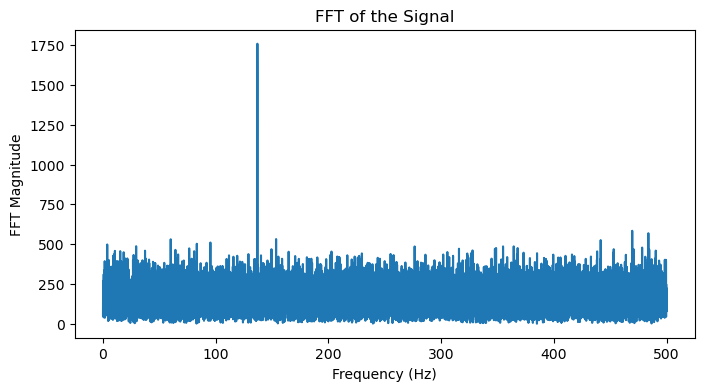

Peak frequency = 136.99 Hz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data.
data = np.loadtxt("arecibo1.txt")

# Set up parameters and compute the FFT.
N = len(data)
dt = 1e-3  
t = np.arange(N) * dt

fft_vals = np.fft.rfft(data)
freqs = np.fft.rfftfreq(N, d=dt)

# Plot the magnitude of the FFT vs frequency.
magnitude = np.abs(fft_vals)
plt.figure(figsize=(8,4))
plt.plot(freqs, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT Magnitude")
plt.title("FFT of the Signal")
plt.show()

# Identify the dominant frequency where the FFT is maximal.
peak_idx = np.argmax(magnitude)     
peak_freq = freqs[peak_idx]        
print(f"Peak frequency = {peak_freq:.2f} Hz")


#### (3) Zero out the non-significant entries from the Fourier transform. Perform an inverse Fourier transform and plot the results. What do you notice?

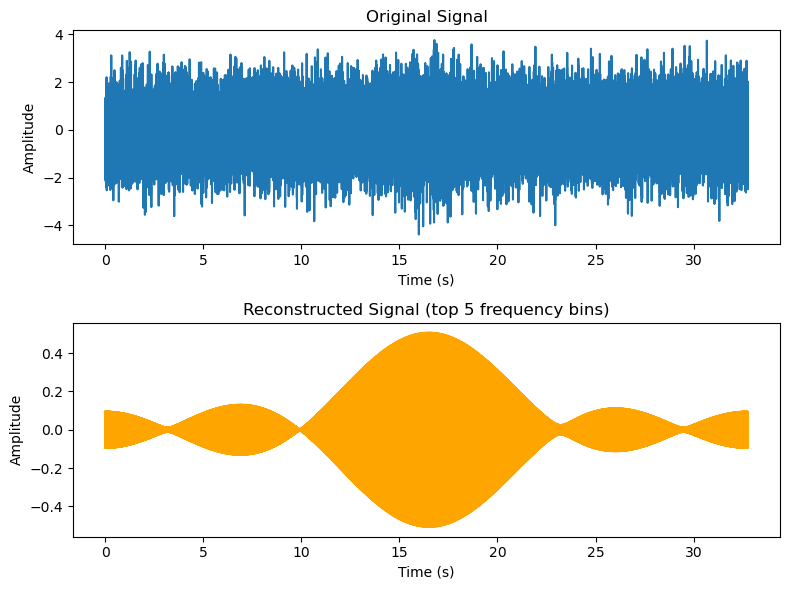

Retained 5 of 16385 frequency bins:
  Freq = 136.99 Hz,  Magnitude = 1758
  Freq = 137.02 Hz,  Magnitude = 1710
  Freq = 136.96 Hz,  Magnitude = 1659
  Freq = 137.05 Hz,  Magnitude = 1624
  Freq = 137.08 Hz,  Magnitude = 1576


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data 
data = np.loadtxt("arecibo1.txt")
N = len(data)
dt = 1e-3  # 1 ms
t = np.arange(N) * dt

# Compute one-sided FFT (for real data) and frequencies
fft_vals = np.fft.rfft(data)
freqs    = np.fft.rfftfreq(N, d=dt)

# Keep only the largest Nkeep frequency components
magnitude = np.abs(fft_vals)

# Sort by descending magnitude
idx_sorted = np.argsort(magnitude)[::-1]

# Choose how many you want to keep 
Nkeep = 5
keep_indices = idx_sorted[:Nkeep]

# Make a copy of fft_vals but zero out everything except the top bins
fft_filtered = np.zeros_like(fft_vals, dtype=fft_vals.dtype)
fft_filtered[keep_indices] = fft_vals[keep_indices]

# Inverse transform the filtered spectrum
reconstructed = np.fft.irfft(fft_filtered, n=N)

# Plot the original and reconstructed signals side by side
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(t, data)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2,1,2)
plt.plot(t, reconstructed, color='orange')
plt.title(f"Reconstructed Signal (top {Nkeep} frequency bins)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Print details of retained coefficients

print(f"Retained {Nkeep} of {len(fft_vals)} frequency bins:")
for idx in keep_indices:
    print(f"  Freq = {freqs[idx]:.2f} Hz,  Magnitude = {magnitude[idx]:.4g}")


By plotting the original (noisy) data in one subplot and the filtered version in another, I can see how much noise is removed and which oscillations remain.The reconstructed signal (orange) is clearly a superposition of just a handful of smooth sinusoidal waves.
Most of the random noise visible in the original data (blue) is gone, leaving a “clean” low‐frequency shape.

By zeroing out all the small‐magnitude frequency bins, you’ve effectively stripped away the noise and preserved only the dominant sinusoidal features that were hidden in the raw time‐domain plot.

## 2: Some noisy (literally) data

We have some data (in the attached wav file) that has been captured from a noisy room. It sounds, and looks like, there may be no distinct frequency. However, Fourier/spectral techniques may reveal otherwise. 


#### (4) Make use of scipy's io functions to read in and plot the data in the included wav file. Add a sine wave to the data of the given form and plot the signal (our generated sine wave), the recorded noise, and the total on the same time series plot.

In this step, we are injecting a 'true signal' into our data, to make the subsequent frequency analysis a bit clearer. Pick an amplitude, frequency, and phase, and add it to the noise from the wav file.

Sample rate: 48000
Data shape: (2880000, 2)
Data type: int16
Channel 0 range: 58405
Channel 1 range: 61015
Using Channel 1


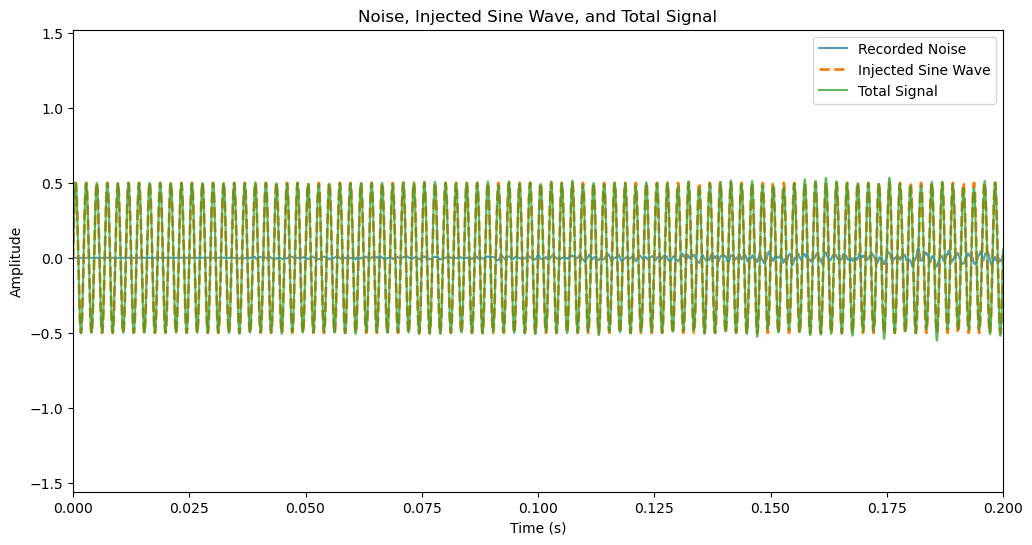

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read in the wav file.
sample_rate, noise_data = wavfile.read("crowd-talking-1.wav")
print("Sample rate:", sample_rate)
print("Data shape:", noise_data.shape)
print("Data type:", noise_data.dtype)

if noise_data.ndim > 1:
    channel0 = noise_data[:, 0].astype(np.int32)
    channel1 = noise_data[:, 1].astype(np.int32)
    
    channel0_range = channel0.max() - channel0.min()
    channel1_range = channel1.max() - channel1.min()
    
    print("Channel 0 range:", channel0_range)
    print("Channel 1 range:", channel1_range)
    
    if channel0_range >= channel1_range:
        noise_channel = noise_data[:, 0]
        print("Using Channel 0")
    else:
        noise_channel = noise_data[:, 1]
        print("Using Channel 1")
else:
    noise_channel = noise_data

# Normalize the noise data.
# Convert from int16 to float and normalize to [-1, 1].
noise_channel = noise_channel.astype(np.float32) / np.iinfo(np.int16).max

# Create a time axis for the noise data.
num_samples = len(noise_channel)
time = np.arange(num_samples) / sample_rate

# Generate the injected sine wave.
# Choose parameters: amplitude, frequency (Hz), and phase (radians).
amplitude = 0.5    
frequency = 440    
phase = 0        
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time + phase)

total_signal = noise_channel + sine_wave

# Plot the signals.
plt.figure(figsize=(12, 6))
plt.plot(time, noise_channel, label="Recorded Noise", alpha=0.75)
plt.plot(time, sine_wave, label="Injected Sine Wave", linestyle="--", linewidth=2)
plt.plot(time, total_signal, label="Total Signal", alpha=0.75)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Noise, Injected Sine Wave, and Total Signal")
plt.legend()

plt.xlim(0, 0.2)
plt.show()


#### (5) Welch's method can be used to perform spectral density estimation. 

* Use scipy's implementation of Welch's method to compute and plot a PSD for the noisy data.
* Do you have any observations about the shape of the data?

Sample rate: 48000
Data shape: (2880000, 2)
Data type: int16
Channel 0 range: 58405
Channel 1 range: 61015
Using Channel 1


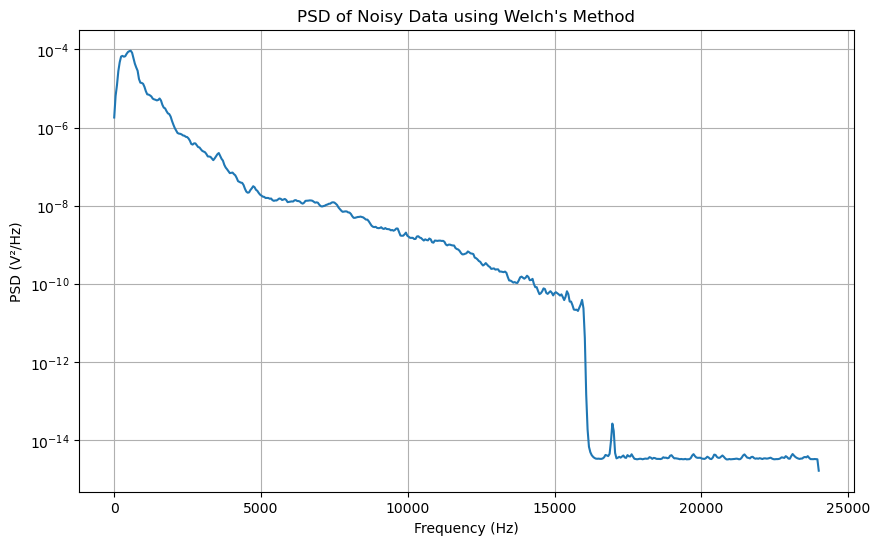

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import welch

# Read in the wav file.
sample_rate, noise_data = wavfile.read("crowd-talking-1.wav")
print("Sample rate:", sample_rate)
print("Data shape:", noise_data.shape)
print("Data type:", noise_data.dtype)

# Select the channel with the larger dynamic range (using int32 conversion to avoid overflow).
if noise_data.ndim > 1:
    channel0 = noise_data[:, 0].astype(np.int32)
    channel1 = noise_data[:, 1].astype(np.int32)
    channel0_range = channel0.max() - channel0.min()
    channel1_range = channel1.max() - channel1.min()
    print("Channel 0 range:", channel0_range)
    print("Channel 1 range:", channel1_range)
    if channel0_range >= channel1_range:
        noise_channel = channel0
        print("Using Channel 0")
    else:
        noise_channel = channel1
        print("Using Channel 1")
else:
    noise_channel = noise_data

# Normalize the noise data to floating point values in [-1, 1].
noise_channel = noise_channel.astype(np.float32) / np.iinfo(np.int16).max

# Compute the PSD using Welch's method.
frequencies, psd = welch(noise_channel, fs=sample_rate, nperseg=1024)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V²/Hz)")
plt.title("PSD of Noisy Data using Welch's Method")
plt.grid(True)
plt.show()


It is interesting that PSD decreases with high frequency. 

#### (6) Now compare the PSDs of the 2 quantities: the noise, and the noise with the sine wave. The frequency resolution of the PSD is inversely proportional to the length of the FFT. Use the 'nperseg' quantity to adjust the FFT length until the injected signal is easily visible in the plot.

Sample rate: 48000
Data shape: (2880000, 2)
Data type: int16
Channel 0 range: 58405
Channel 1 range: 61015
Using Channel 1


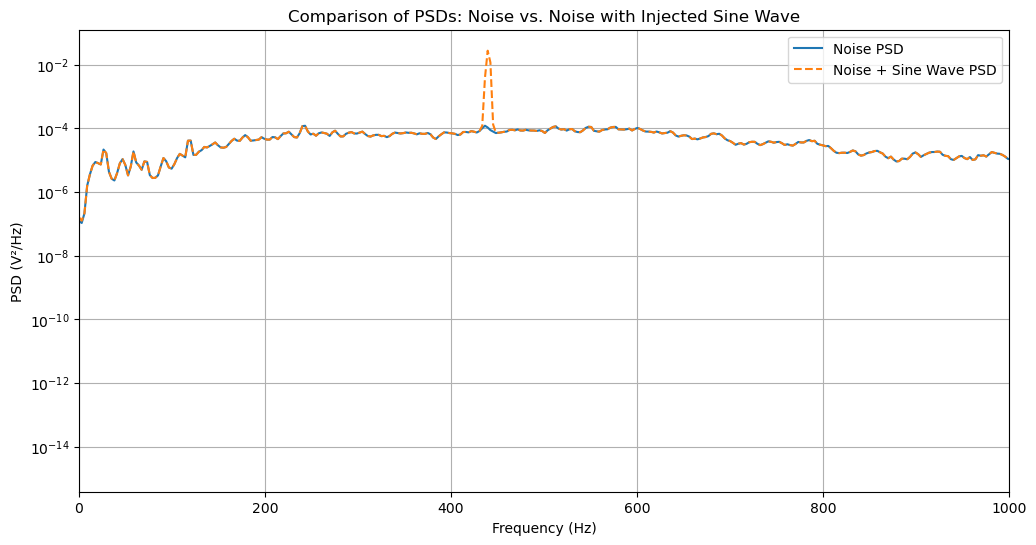

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import welch

# Read in and normalize the WAV file
sample_rate, noise_data = wavfile.read("crowd-talking-1.wav")
print("Sample rate:", sample_rate)
print("Data shape:", noise_data.shape)
print("Data type:", noise_data.dtype)

if noise_data.ndim > 1:
    channel0 = noise_data[:, 0].astype(np.int32)
    channel1 = noise_data[:, 1].astype(np.int32)
    channel0_range = channel0.max() - channel0.min()
    channel1_range = channel1.max() - channel1.min()
    print("Channel 0 range:", channel0_range)
    print("Channel 1 range:", channel1_range)
    if channel0_range >= channel1_range:
        noise_channel = noise_data[:, 0]
        print("Using Channel 0")
    else:
        noise_channel = noise_data[:, 1]
        print("Using Channel 1")
else:
    noise_channel = noise_data

noise_channel = noise_channel.astype(np.float32) / np.iinfo(np.int16).max

num_samples = len(noise_channel)
time = np.arange(num_samples) / sample_rate

amplitude = 0.5    
frequency = 440    
phase = 0          
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time + phase)

# Combine the noise with the injected sine wave
total_signal = noise_channel + sine_wave


nperseg = 16384

f_noise, psd_noise = welch(noise_channel, fs=sample_rate, nperseg=nperseg)

# Compute PSD for the noise + sine wave signal
f_total, psd_total = welch(total_signal, fs=sample_rate, nperseg=nperseg)

# Plot and compare the PSDs
plt.figure(figsize=(12, 6))
plt.semilogy(f_noise, psd_noise, label="Noise PSD")
plt.semilogy(f_total, psd_total, label="Noise + Sine Wave PSD", linestyle="--")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V²/Hz)")
plt.title("Comparison of PSDs: Noise vs. Noise with Injected Sine Wave")
plt.legend()
plt.grid(True)

plt.xlim(0, 1000)
plt.show()


#### Let's say we are trying to estimate the amplitude and frequency of this sine wave. How might we do it?

One familiar technique is fitting. However, in this case the signal is much smaller than the noise, so directly fitting the data would not converge with any accuracy or precision.

Given a model for the signal that it has a frequency "near" f_sig, we can use the following recipe, which is known as 'heterodyne detection':

$$z_{estimate} = \int_{t_0}^{t_1} data(t) * LO(t) dt$$

where $$LO(t) = e^{i \omega t}$$

this is essentially a single frequency Fourier Transform. By averaging over a sufficiently long time, all of the contributions from frequencies other than $f_{sig}$ will disappear.

In Python, we can implement this performing a "moving average" on the integrand. The output, (smoothed(z_estimate)), will give a running estimate of the cosine and sine components of the signal. These can be readily turned into estimates of the amplitude and frequency/phase of the signal.

#### (7) Now calculate the uncertainty in the amplitude and the phase estimate by computing the variance of the resulting heterodyned signal.

A heterodyne is a signal frequency that is created by combining or mixing two other frequencies.

* First, write a function that computes the moving average over a given number of data points. **Hint**: Think about how you can use a convolution to compute this average

* Use this function to compute estimates for the amplitude and phase of the signal.

Sample rate: 48000
Data shape: (2880000, 2)
Data type: int16
Channel 0 range: 58405
Channel 1 range: 61015
Using Channel 1


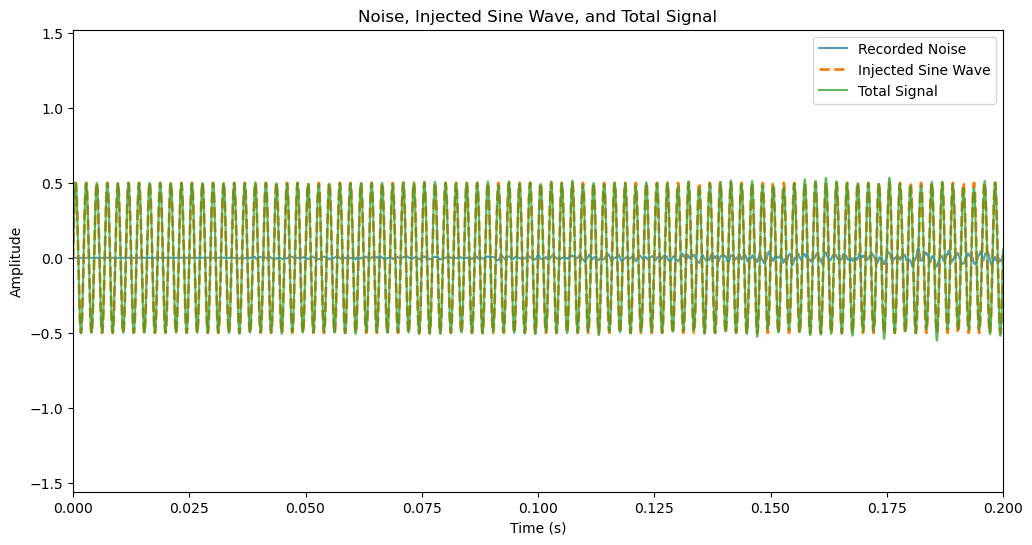

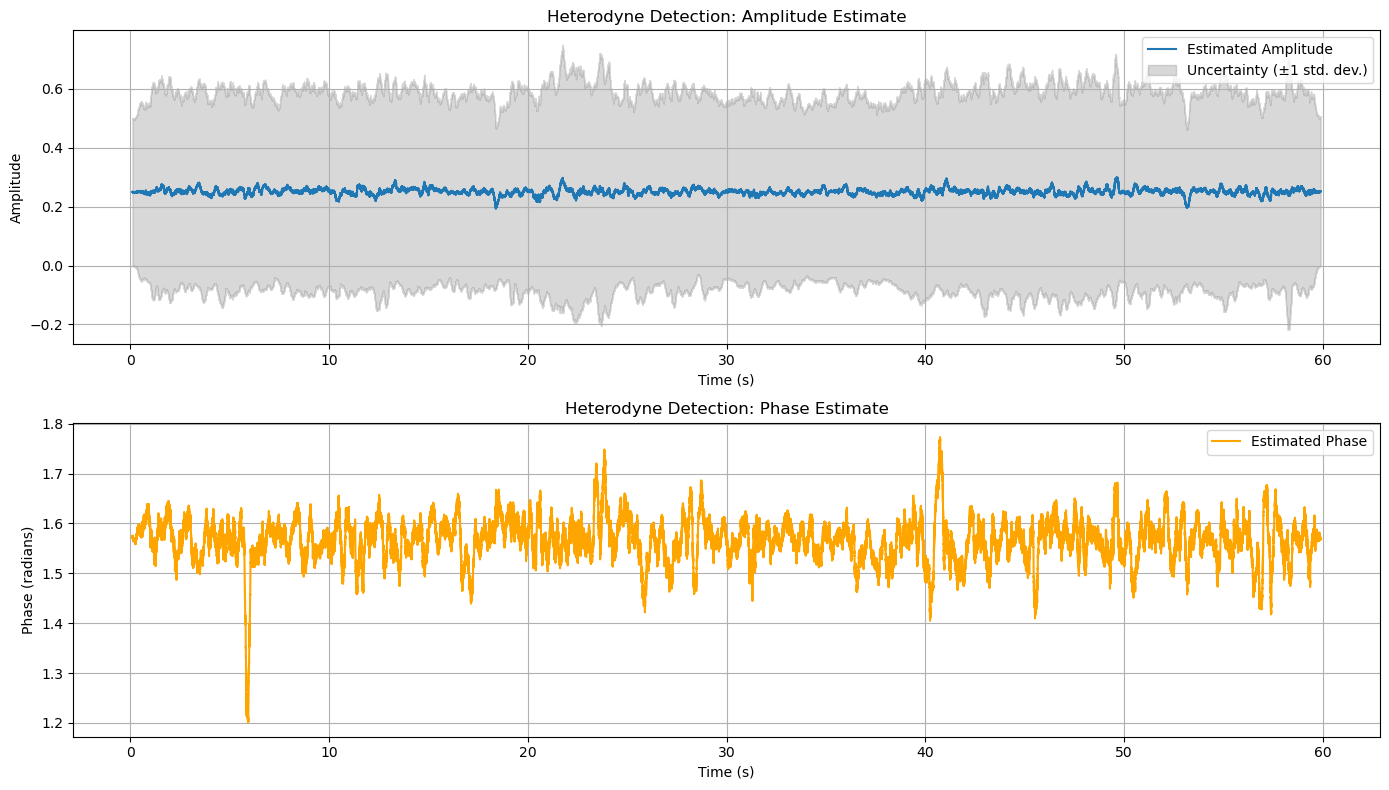

Injected amplitude: 0.5000
Mean estimated amplitude: 0.2505
Injected phase (radians): 0.0000
Mean estimated phase (radians): 1.5660
Mean uncertainty (std. dev.): 0.3387


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


sample_rate, noise_data = wavfile.read("crowd-talking-1.wav")
print("Sample rate:", sample_rate)
print("Data shape:", noise_data.shape)
print("Data type:", noise_data.dtype)

if noise_data.ndim > 1:
    channel0 = noise_data[:, 0].astype(np.int32)
    channel1 = noise_data[:, 1].astype(np.int32)
    
    channel0_range = channel0.max() - channel0.min()
    channel1_range = channel1.max() - channel1.min()
    
    print("Channel 0 range:", channel0_range)
    print("Channel 1 range:", channel1_range)
    
    if channel0_range >= channel1_range:
        noise_channel = noise_data[:, 0]
        print("Using Channel 0")
    else:
        noise_channel = noise_data[:, 1]
        print("Using Channel 1")
else:
    noise_channel = noise_data


noise_channel = noise_channel.astype(np.float32) / np.iinfo(np.int16).max

# Create a time axis for the noise data.
num_samples = len(noise_channel)
time = np.arange(num_samples) / sample_rate


# Choose parameters: amplitude, frequency (Hz), and phase (radians).
amplitude = 0.5    
frequency = 440    
phase = 0        
sine_wave = amplitude * np.sin(2 * np.pi * frequency * time + phase)

# Combine the noise with the injected sine wave.
total_signal = noise_channel + sine_wave

plt.figure(figsize=(12, 6))
plt.plot(time, noise_channel, label="Recorded Noise", alpha=0.75)
plt.plot(time, sine_wave, label="Injected Sine Wave", linestyle="--", linewidth=2)
plt.plot(time, total_signal, label="Total Signal", alpha=0.75)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Noise, Injected Sine Wave, and Total Signal")
plt.legend()
plt.xlim(0, 0.2)
plt.show()


LO = np.exp(1j * 2 * np.pi * frequency * time)

# Multiply (mix) the total signal by the LO to shift the target sine wave to DC.
z = total_signal * LO

def moving_average(data, window_size):
    """Compute the moving average using convolution (mode 'valid')."""
    kernel = np.ones(window_size) / window_size
    return np.convolve(data, kernel, mode='valid')

def moving_variance(data, window_size):
    """
    Compute the moving variance.
    For a (possibly complex) data array, variance = E[|x|^2] - |E[x]|^2,
    where E[...] is the moving average.
    """
    ma = moving_average(data, window_size)
    ma2 = moving_average(np.abs(data)**2, window_size)
    return ma2 - np.abs(ma)**2

#  Compute the moving average and variance of the heterodyned signal
window_size = 10000 

z_smoothed = moving_average(z, window_size)
z_variance = moving_variance(z, window_size)

amplitude_estimate = np.abs(z_smoothed)
phase_estimate = np.angle(z_smoothed)
uncertainty_estimate = np.sqrt(z_variance)  
time_smoothed = moving_average(time, window_size)

# Plot the Heterodyne Detection Results
plt.figure(figsize=(14, 8))

# Plot the amplitude estimate with uncertainty.
plt.subplot(2, 1, 1)
plt.plot(time_smoothed, amplitude_estimate, label="Estimated Amplitude")
plt.fill_between(time_smoothed,
                 amplitude_estimate - uncertainty_estimate,
                 amplitude_estimate + uncertainty_estimate,
                 color='gray', alpha=0.3, label="Uncertainty (±1 std. dev.)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Heterodyne Detection: Amplitude Estimate")
plt.legend()
plt.grid(True)

# Plot the phase estimate.
plt.subplot(2, 1, 2)
plt.plot(time_smoothed, phase_estimate, label="Estimated Phase", color="orange")
plt.xlabel("Time (s)")
plt.ylabel("Phase (radians)")
plt.title("Heterodyne Detection: Phase Estimate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print Summary Statistics
print("Injected amplitude: {:.4f}".format(amplitude))
print("Mean estimated amplitude: {:.4f}".format(np.mean(amplitude_estimate)))
print("Injected phase (radians): {:.4f}".format(phase))
print("Mean estimated phase (radians): {:.4f}".format(np.mean(phase_estimate)))
print("Mean uncertainty (std. dev.): {:.4f}".format(np.mean(uncertainty_estimate)))
